# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('iowa_liquor_sales.csv')
df.head(2)

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/anaconda/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53


In [3]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [4]:
#reformatted dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [5]:
df['Date'].head(2)

0   2016-03-31
1   2016-03-31
Name: Date, dtype: datetime64[ns]

In [6]:
#remove '$' from columns

df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: float(x.strip('$')))
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: float(x.strip('$')))
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: float(x.strip('$')))

In [7]:
df.rename(columns = {'Bottle Volume (ml)': 'Bottle Volume'}, inplace=True)
df.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53


In [10]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [11]:
df['State Bottle Cost'].mean()

9.81620942870891

In [12]:
df['State Bottle Retail'].mean()

14.740117521274758

In [13]:
df['Bottles Sold'].mean()

9.838389888808187

In [14]:
df['Sale (Dollars)'].mean()

129.11910023830947

In [15]:
df['Bottle Volume'].mean()

924.2111260459294

In [16]:
df_sorted = df.groupby(['Store Number', 'Zip Code'])['Sale (Dollars)'].sum().sort_values()
print df_sorted.head(10)
print df_sorted.tail(10)

Store Number  Zip Code
4926          50322        20.04
4874          52641        70.32
4861          52404        89.16
4703          51101       120.24
4852          52404       140.64
4757          50035       159.06
5076          51106       172.80
4735          52501       173.76
4796          50321       173.76
4821          52577       219.12
Name: Sale (Dollars), dtype: float64
Store Number  Zip Code
3354          52807        2791626.27
3773          52401        2846275.25
2670          52241        2939714.05
3814          50266        3228425.04
3952          52722        3660068.45
3420          50311        3818165.13
3385          52402        4499578.83
2512          52240        5094112.61
4829          50314       10677520.03
2633          50320       11865805.85
Name: Sale (Dollars), dtype: float64


In [17]:
df_sorted_city = df.groupby(['City', 'Store Number'])['Sale (Dollars)'].mean().sort_values()
print df_sorted_city.head(10)
print df_sorted_city.tail(10)

City             Store Number
COUNCIL BLUFFS   5056            16.226333
CHARITON         5218            19.455806
WEST BRANCH      4170            22.599439
WEST DES MOINES  4773            24.135070
URBANDALE        4939            26.062791
MOUNT PLEASANT   4874            26.123585
BLUE GRASS       4967            26.448506
DES MOINES       5136            26.856530
CEDAR RAPIDS     5176            27.307604
WILTON           5070            27.803145
Name: Sale (Dollars), dtype: float64
City             Store Number
SWISHER          9001             721.130909
SIOUX CITY       3447             742.418559
LECLAIRE         9002             744.686653
CEDAR RAPIDS     3385             775.743731
WINDSOR HEIGHTS  3420            1038.886905
Carroll          9023            1090.786667
CORALVILLE       4677            1744.856776
Davenport        9022            2321.760000
WEST DES MOINES  3814            2350.002821
Dubuque          9018            7275.000000
Name: Sale (Dollars), d

In [18]:
#Most/least common prices for State Bottle Cost
print df['State Bottle Cost'].value_counts().head()

8.25     61549
6.50     48647
9.00     43436
10.00    42490
10.49    40135
Name: State Bottle Cost, dtype: int64


In [19]:
#Most/least common prices for State Bottle Cost
state_bottle_cost = pd.DataFrame(df['State Bottle Cost'].value_counts()).reset_index()
state_bottle_cost.columns = ('cost', '# of bottles')
state_bottle_cost.head(2)

,cost,# of bottles
0,8.25,61549
1,6.50,48647


In [20]:
state_bottle_cost['cost'].describe()

count    1471.000000
mean       46.759137
std       353.703832
min         0.890000
25%         7.575000
50%        14.050000
75%        26.345000
max      6468.000000
Name: cost, dtype: float64

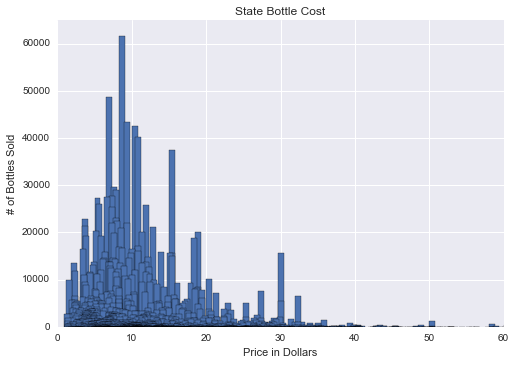

In [21]:
plt.bar(state_bottle_cost['cost'], state_bottle_cost['# of bottles'])
plt.xlim(0, 60)
plt.ylim(0, 65000)
plt.ylabel("# of Bottles Sold")
plt.xlabel("Price in Dollars")
plt.title("State Bottle Cost")

In [22]:
#Most/least common prices for State Bottle Retail
print df['State Bottle Retail'].value_counts().head()

12.38    61549
9.75     49084
13.50    43942
15.00    42567
15.74    38370
Name: State Bottle Retail, dtype: int64


In [23]:
#Most/least common prices for State Bottle Cost
state_bottle_retail = pd.DataFrame(df['State Bottle Retail'].value_counts()).reset_index()
state_bottle_retail.columns = ('retail', '# of bottles')
state_bottle_retail.head(2)

,retail,# of bottles
0,12.38,61549
1,9.75,49084


In [24]:
#Most/least common prices for State Bottle Retail Price
state_bottle_retail = pd.DataFrame(df['State Bottle Retail'].value_counts()).reset_index()
state_bottle_retail.columns = ('retail', '# of bottles')
state_bottle_retail.head(10)
# print df['State Bottle Retail'].value_counts().tail()

,retail,# of bottles
0,12.38,61549
1,9.75,49084
2,13.50,43942
3,15.00,42567
4,15.74,38370
5,22.50,37583
6,10.76,29630
7,11.21,28936
8,10.50,27669
9,9.45,27472


In [25]:
state_bottle_retail['retail'].describe()

count    1525.000000
mean       68.367410
std       521.158133
min         1.340000
25%        11.330000
50%        20.990000
75%        38.970000
max      9702.000000
Name: retail, dtype: float64

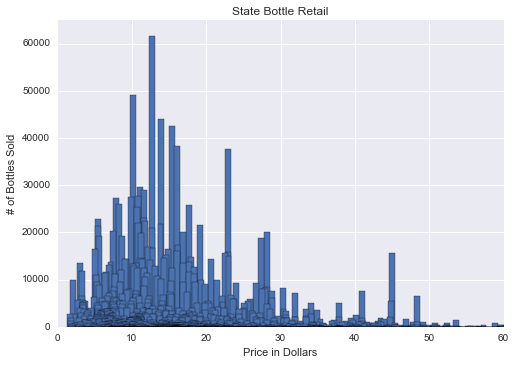

In [26]:
plt.bar(state_bottle_retail['retail'], state_bottle_retail['# of bottles'])
plt.xlim(0, 60)
plt.ylim(0, 65000)
plt.ylabel("# of Bottles Sold")
plt.xlabel("Price in Dollars")
plt.title("State Bottle Retail")

In [27]:
#Most common amounts of Bottles Sold per transaction
print df['Bottles Sold'].value_counts().head(3)

12    729679
6     523228
2     376696
Name: Bottles Sold, dtype: int64


In [28]:
#bottles sold by bottles per order (12 bottles (a case) is most popular order, 
# 6 bottles (1/2 case) is second most popular)
bottles_sold = pd.DataFrame(df['Bottles Sold'].value_counts()).reset_index()
bottles_sold.columns = ('# of bottles', 'total # of bottles by order size')
bottles_sold.head(10)

,# of bottles,total # of bottles by order size
0,12,729679
1,6,523228
2,2,376696
3,1,313147
4,3,280903
5,4,149473
6,24,148590
7,48,37388
8,5,31965
9,36,21104


In [29]:
#Total number of gallons of alcohol sold in Iowa
print df['Volume Sold (Gallons)'].sum()

6386460.60989


In [30]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [31]:
#Bottles Sold By Store Number
bottles_by_store = pd.pivot_table(df, values=['Bottles Sold'], index=['County', 'City', 'Store Number'], 
                          aggfunc=sum)
bottles_by_store.head(10)

Bottles Sold
County    City          Store Number              
Adair     ADAIR         4417                  3286
                        4753                  1129
          FONTANELLE    4620                  4987
          GREENFIELD    3969                   793
                        4317                  9192
                        5052                  3879
          STUART        3461                 12787
                        4654                  7450
Adams     CORNING       2327                 10173
Allamakee HARPERS FERRY 4896                  2365

In [32]:
#identify lowest performing stores
bottles_by_store.sort_values((['Bottles Sold']), axis=0, ascending=True)

Bottles Sold
County        City            Store Number              
Dickinson     OKOBOJI         4486                   103
Polk          URBANDALE       4939                   110
              DES MOINES      4567                   118
Johnson       IOWA CITY       5053                   126
Pottawattamie COUNCIL BLUFFS  5056                   158
Benton        BELLE PLAINE    4059                   164
Cass          GRISWOLD        4990                   239
Scott         DAVENPORT       5130                   248
              Davenport       9022                   252
Louisa        WAPELLO         4121                   271
Linn          ROBINS          5192                   332
Black Hawk    GILBERTVILLE    5202                   335
Polk          DES MOINES      5136                   336
Pottawattamie COUNCIL BLUFFS  5195                   350
Carroll       Carroll         9023                   372
Dubuque       DUBUQUE         5201                   391
Carroll       GLIDDEN         5205                   427
Lyon          INWOOD          4335                   448
Carroll       CARROLL         4776                   469
Buena Vista   STORM LAKE      4778                   522
Sac           SCHALLER        3864                   581
Monona        MAPLETON        5120                   589
Pottawattamie COUNCIL BLUFFS  5161                   611
Dickinson     LAKE PARK       4030                   640
Clayton       GUTTENBERG      4672                   656
Lee           MONTROSE        5213                   676
Buena Vista   STORM LAKE      4737                   686
Guthrie       GUTHRIE CENTER  5191                   705
Polk          WEST DES MOINES 2961                   721
Delaware      DELHI           5175                   721
...                                                  ...
Polk          URBANDALE       2663                115692
              WEST DES MOINES 2619                116077
              DES MOINES      2561                116350
              WEST DES MOINES 2648                118209
Woodbury      SIOUX CITY      3820                119671
Story         AMES            2500                122091
Black Hawk    CEDAR FALLS     2106                123603
Story         AMES            2501                127344
                              3524                127972
Carroll       CARROLL         2593                128805
Pottawattamie COUNCIL BLUFFS  2629                130652
Polk          DES MOINES      2190                132694
Woodbury      SIOUX CITY      3447                134520
Scott         DAVENPORT       2614                134766
Dallas        WEST DES MOINES 3814                135756
Black Hawk    WATERLOO        3494                137901
Clinton       CLINTON         2616                142425
Polk          DES MOINES      2627                154185
Scott         DAVENPORT       2625                157375
Dubuque       DUBUQUE         4167                160274
Linn          CEDAR RAPIDS    3773                168781
Scott         DAVENPORT       3354                172162
Linn          MOUNT VERNON    5102                181497
Johnson       CORALVILLE      2670                196258
Scott         BETTENDORF      3952                220121
Polk          WINDSOR HEIGHTS 3420                226532
Linn          CEDAR RAPIDS    3385                296426
Johnson       IOWA CITY       2512                356873
Polk          DES MOINES      4829                657032
                              2633                744424

[1381 rows x 1 columns]

In [33]:
print df['Category Name'].value_counts().head(20)

VODKA 80 PROOF                        353491
CANADIAN WHISKIES                     269894
STRAIGHT BOURBON WHISKIES             153806
SPICED RUM                            145731
VODKA FLAVORED                        141964
TEQUILA                               121863
BLENDED WHISKIES                      116085
WHISKEY LIQUEUR                       109731
IMPORTED VODKA                        108106
PUERTO RICO & VIRGIN ISLANDS RUM       99756
FLAVORED RUM                           72696
TENNESSEE WHISKIES                     72148
AMERICAN COCKTAILS                     68255
AMERICAN DRY GINS                      65590
AMERICAN GRAPE BRANDIES                64802
IMPORTED VODKA - MISC                  64718
MISC. IMPORTED CORDIALS & LIQUEURS     63494
CREAM LIQUEURS                         62585
SCOTCH WHISKIES                        52301
IMPORTED GRAPE BRANDIES                46561
Name: Category Name, dtype: int64


## Record your findings

Be sure to write out any observations from your exploratory analysis.

Exploratory Analysis: Upon an exploratory review of the data set, the data appears to be quite clean. This is likely due to the source being the State of Iowa. To further clean up, "$" were removed from some columns and data was converted to floats so that descriptive statistics could be performed on numerical data. 

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

Mean Bottle Cost - $9.81
Mean Bottle Retail - $14.74
Mean Bottles Sold (per order) - 9.83
Mean Sale Total - $129.11
Mean Bottle Volume - 924(ml)
Most Common Bottle Cost

Most/least common prices for State Bottle Cost & # Sold at that Price
8.25     61549
6.50     48647
9.00     43436
10.00    42490
10.49    40135

Most/least common prices for Bottle Retail & # Sold at that Price
12.38 	61549
9.75 	49084
13.50 	43942
15.00 	42567
15.74 	38370

Top 10 Stores by Total Sales
2633          50320       11865805.85
4829          50314       10677520.03
2512          52240        5094112.61
3385          52402        4499578.83
3420          50311        3818165.13
3952          52722        3660068.45
3814          50266        3228425.04
2670          52241        2939714.05
3773          52401        2846275.25
3354          52807        2791626.27

Top 10 Performing Stores by Average Sale Amount (City & Store Number)

City             Store Number
Dubuque          9018            7275.000000
WEST DES MOINES  3814            2350.002821
Davenport        9022            2321.760000
CORALVILLE       4677            1744.856776
Carroll          9023            1090.786667
WINDSOR HEIGHTS  3420            1038.886905
CEDAR RAPIDS     3385             775.743731
LECLAIRE         9002             744.686653
SIOUX CITY       3447             742.418559
SWISHER          9001             721.130909

Top 20 Most Popular Liquor Types (Category Name/Units Sold)
VODKA 80 PROOF                        353491
CANADIAN WHISKIES                     269894
STRAIGHT BOURBON WHISKIES             153806
SPICED RUM                            145731
VODKA FLAVORED                        141964
TEQUILA                               121863
BLENDED WHISKIES                      116085
WHISKEY LIQUEUR                       109731
IMPORTED VODKA                        108106
PUERTO RICO & VIRGIN ISLANDS RUM       99756
FLAVORED RUM                           72696
TENNESSEE WHISKIES                     72148
AMERICAN COCKTAILS                     68255
AMERICAN DRY GINS                      65590
AMERICAN GRAPE BRANDIES                64802
IMPORTED VODKA - MISC                  64718
MISC. IMPORTED CORDIALS & LIQUEURS     63494
CREAM LIQUEURS                         62585
SCOTCH WHISKIES                        52301
IMPORTED GRAPE BRANDIES                46561

In [34]:
df.insert(0, 'Year', df['Date'].dt.year)
df.insert(0, 'Month', df['Date'].dt.month)

In [35]:
totals_by_store = pd.pivot_table(df[(df['Year'] == 2015)], 
                                   values=['State Bottle Retail', 'Bottles Sold',
                                           'Volume Sold (Liters)', 'Volume Sold (Gallons)', 
                                           'Sale'], 
                                   index=['Store Number', 'County'], aggfunc=[np.sum, np.mean])
totals_by_store.reset_index(inplace=True)
totals_by_store.head()

Store Number       County          sum                      \
                            Bottles Sold State Bottle Retail   
0         2106   Black Hawk        99998            82829.51   
1         2113      Webster         6483            21725.74   
2         2130   Black Hawk        72562            60908.96   
3         2152  Cerro Gordo         5928            18507.48   
4         2178    Allamakee        20504            40070.07   

                                                     mean                      \
  Volume Sold (Gallons) Volume Sold (Liters) Bottles Sold State Bottle Retail   
0              24832.44             93986.47    19.588247           16.225173   
1               1717.17              6500.83     4.763409           15.963071   
2              17321.29             65562.88    18.374778           15.423895   
3               1628.42              6164.92     4.131010           12.897199   
4               5737.98             21719.49     7.699587           15.046966   

                                              
  Volume Sold (Gallons) Volume Sold (Liters)  
0              4.864337            18.410670  
1              1.261697             4.776510  
2              4.386247            16.602401  
3              1.134787             4.296111  
4              2.154705             8.156023

In [36]:
totals_by_store.columns = [' '.join(col).strip() for col in totals_by_store.columns.values]

In [37]:
totals_by_store.head()

,Store Number,County,sum Bottles Sold,sum State Bottle Retail,sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean State Bottle Retail,mean Volume Sold (Gallons),mean Volume Sold (Liters)
0,2106,Black Hawk,99998,82829.51,24832.44,93986.47,19.588247,16.225173,4.864337,18.410670
1,2113,Webster,6483,21725.74,1717.17,6500.83,4.763409,15.963071,1.261697,4.776510
2,2130,Black Hawk,72562,60908.96,17321.29,65562.88,18.374778,15.423895,4.386247,16.602401
3,2152,Cerro Gordo,5928,18507.48,1628.42,6164.92,4.131010,12.897199,1.134787,4.296111
4,2178,Allamakee,20504,40070.07,5737.98,21719.49,7.699587,15.046966,2.154705,8.156023


In [38]:
totals_by_store.columns = ['Store Number', 'County', 'Sum Bottles Sold', 'Sum Retail Cost',
                           'Sum Volume Sold (Gallons)', 'Sum Volume Sold (Liters)', 'Mean Bottles Sold',
                           'Mean Retail Cost', 'Mean Volume Sold (Gallons)', 'Mean Volume Sold (Liters)']
totals_by_store.head()

,Store Number,County,Sum Bottles Sold,Sum Retail Cost,Sum Volume Sold (Gallons),Sum Volume Sold (Liters),Mean Bottles Sold,Mean Retail Cost,Mean Volume Sold (Gallons),Mean Volume Sold (Liters)
0,2106,Black Hawk,99998,82829.51,24832.44,93986.47,19.588247,16.225173,4.864337,18.410670
1,2113,Webster,6483,21725.74,1717.17,6500.83,4.763409,15.963071,1.261697,4.776510
2,2130,Black Hawk,72562,60908.96,17321.29,65562.88,18.374778,15.423895,4.386247,16.602401
3,2152,Cerro Gordo,5928,18507.48,1628.42,6164.92,4.131010,12.897199,1.134787,4.296111
4,2178,Allamakee,20504,40070.07,5737.98,21719.49,7.699587,15.046966,2.154705,8.156023


In [39]:
df.head(2)

,Month,Year,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,3,2016,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,3,2016,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53


In [40]:
q1_2015 = pd.pivot_table(df[((df['Year'] == 2015) &  (df['Month'] <= 3))], 
                                   values=['Sale', 'Bottles Sold',
                                           'Volume Sold (Liters)', 'Sale (Dollars)'], 
                                   index=['Store Number'], aggfunc=[np.sum])
q1_2015.columns = [' '.join(col).strip() for col in q1_2015.columns.values]
q1_2015.reset_index(inplace=True)
q1_2015.head()

,Store Number,sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Liters)
0,2106,23316,337166.53,21815.55
1,2113,1618,22351.86,1604.08
2,2130,17707,277764.46,16176.37
3,2152,1375,16805.11,1414.59
4,2178,4279,54411.42,4376.38


In [41]:
sales_2015 = pd.merge(totals_by_store, q1_2015, how='inner', on='Store Number')
sales_2015.head()

,Store Number,County,Sum Bottles Sold,Sum Retail Cost,Sum Volume Sold (Gallons),Sum Volume Sold (Liters),Mean Bottles Sold,Mean Retail Cost,Mean Volume Sold (Gallons),Mean Volume Sold (Liters),sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Liters)
0,2106,Black Hawk,99998,82829.51,24832.44,93986.47,19.588247,16.225173,4.864337,18.410670,23316,337166.53,21815.55
1,2113,Webster,6483,21725.74,1717.17,6500.83,4.763409,15.963071,1.261697,4.776510,1618,22351.86,1604.08
2,2130,Black Hawk,72562,60908.96,17321.29,65562.88,18.374778,15.423895,4.386247,16.602401,17707,277764.46,16176.37
3,2152,Cerro Gordo,5928,18507.48,1628.42,6164.92,4.131010,12.897199,1.134787,4.296111,1375,16805.11,1414.59
4,2178,Allamakee,20504,40070.07,5737.98,21719.49,7.699587,15.046966,2.154705,8.156023,4279,54411.42,4376.38


In [42]:
sales_2015['sum Sale (Dollars)'].isnull().value_counts()

False    1283
Name: sum Sale (Dollars), dtype: int64

In [43]:
sales_2015.shape

(1283, 13)

In [44]:
total_2015_sales = pd.DataFrame(df['Store Number'].value_counts()).reset_index()
total_2015_sales.columns = ['Store Number', 'Total Number of Sales']
total_2015_sales.head()

,Store Number,Total Number of Sales
0,2633,24336
1,4829,22851
2,2512,17962
3,2572,17085
4,2515,16167


In [45]:
sales_totals_2015 = pd.merge(sales_2015, total_2015_sales, on='Store Number', how='left')
sales_totals_2015.head(20)

,Store Number,County,Sum Bottles Sold,Sum Retail Cost,Sum Volume Sold (Gallons),Sum Volume Sold (Liters),Mean Bottles Sold,Mean Retail Cost,Mean Volume Sold (Gallons),Mean Volume Sold (Liters),sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Liters),Total Number of Sales
0,2106,Black Hawk,99998,82829.51,24832.44,93986.47,19.588247,16.225173,4.864337,18.410670,23316,337166.53,21815.55,6334
1,2113,Webster,6483,21725.74,1717.17,6500.83,4.763409,15.963071,1.261697,4.776510,1618,22351.86,1604.08,1754
2,2130,Black Hawk,72562,60908.96,17321.29,65562.88,18.374778,15.423895,4.386247,16.602401,17707,277764.46,16176.37,4988
3,2152,Cerro Gordo,5928,18507.48,1628.42,6164.92,4.131010,12.897199,1.134787,4.296111,1375,16805.11,1414.59,1742
4,2178,Allamakee,20504,40070.07,5737.98,21719.49,7.699587,15.046966,2.154705,8.156023,4279,54411.42,4376.38,3262
5,2190,Polk,107522,229725.84,17021.88,64391.65,8.357065,17.855265,1.323013,5.004792,22457,255939.81,14065.73,16016
6,2191,Lee,79024,95227.02,21458.29,81224.18,14.200180,17.111774,3.855937,14.595540,20120,319020.69,20393.82,7055
7,2200,Sac,15410,67743.76,4567.20,17291.84,3.970626,17.455233,1.176810,4.455511,3075,45340.33,3393.35,4822
8,2205,Page,17892,44477.09,3941.03,14919.66,6.048682,15.036204,1.332329,5.043834,4556,57849.23,3765.60,2958
9,2228,Madison,14932,42250.12,4013.71,15188.97,5.296914,14.987627,1.423806,5.388070,3974,51031.04,4213.40,3489


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [46]:
corr_df = sales_totals_2015[3:]

In [47]:
corr_df.corr()

,Store Number,Sum Bottles Sold,Sum Retail Cost,Sum Volume Sold (Gallons),Sum Volume Sold (Liters),Mean Bottles Sold,Mean Retail Cost,Mean Volume Sold (Gallons),Mean Volume Sold (Liters),sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Liters),Total Number of Sales
Store Number,1.000000,-0.364649,-0.542508,-0.380713,-0.380729,0.257519,-0.232064,0.077934,0.077803,-0.355007,-0.327000,-0.371751,-0.552979
Sum Bottles Sold,-0.364649,1.000000,0.805866,0.985534,0.985521,0.218073,0.258226,0.294300,0.294318,0.989684,0.976734,0.974774,0.777332
Sum Retail Cost,-0.542508,0.805866,1.000000,0.787415,0.787396,-0.040625,0.343159,0.045382,0.045430,0.776394,0.745108,0.760721,0.988914
Sum Volume Sold (Gallons),-0.380713,0.985534,0.787415,1.000000,1.000000,0.224453,0.303210,0.357415,0.357454,0.979939,0.985274,0.990562,0.751918
Sum Volume Sold (Liters),-0.380729,0.985521,0.787396,1.000000,1.000000,0.224449,0.303231,0.357436,0.357475,0.979928,0.985269,0.990563,0.751897
Mean Bottles Sold,0.257519,0.218073,-0.040625,0.224453,0.224449,1.000000,0.052489,0.870264,0.870157,0.213874,0.223887,0.213835,-0.063473
Mean Retail Cost,-0.232064,0.258226,0.343159,0.303210,0.303231,0.052489,1.000000,0.294261,0.294381,0.245618,0.287566,0.287740,0.276004
Mean Volume Sold (Gallons),0.077934,0.294300,0.045382,0.357415,0.357436,0.870264,0.294261,1.000000,1.000000,0.289833,0.333195,0.340959,0.009036
Mean Volume Sold (Liters),0.077803,0.294318,0.045430,0.357454,0.357475,0.870157,0.294381,1.000000,1.000000,0.289853,0.333224,0.340999,0.009083
sum Bottles Sold,-0.355007,0.989684,0.776394,0.979939,0.979928,0.213874,0.245618,0.289833,0.289853,1.000000,0.988642,0.987893,0.745973


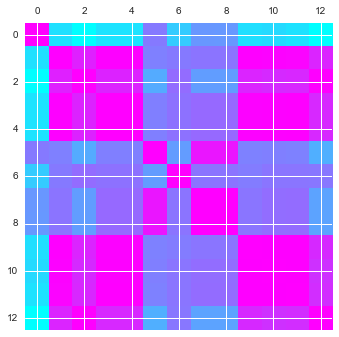

In [48]:
plt.matshow(corr_df.corr(), cmap='cool')

# Build your models & Plot your results

Make sure that you record any valuable information.

In [49]:
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [50]:
#Setting Sum of Total Sales to what we want to predict.
y = sales_totals_2015['sum Sale (Dollars)']
y.head()

0    337166.53
1     22351.86
2    277764.46
3     16805.11
4     54411.42
Name: sum Sale (Dollars), dtype: float64

We will use the Total Sales Amount  (['sum Sale (Dollars)']) as the Y variable that we wish to predict. In order to predict this Y, I will run a series of Linear Regressions to determine what X variables help to predict Y. In doing this, we can determine how to adjust Xs for their movement with Y. The ultimate deliverable insight would be to adjus the X variables at particular stores in order to maximize sales.

In [51]:
#Setting Xs to all factors that might predict Total Annual Sales 
xs = [['Sum Bottles Sold'], ['Sum Retail Cost'], ['Sum Volume Sold (Gallons)'], ['Sum Volume Sold (Liters)'],
    ['Mean Bottles Sold'], ['Mean Retail Cost'], ['Mean Volume Sold (Gallons)'],['Mean Volume Sold (Liters)'], 
      ['sum_q1_Bottles Sold'], ['sum_q1_Sale (Dollars)'], ['sum_q1_Volume Sold (Liters)']]
xs

[['Sum Bottles Sold'],
 ['Sum Retail Cost'],
 ['Sum Volume Sold (Gallons)'],
 ['Sum Volume Sold (Liters)'],
 ['Mean Bottles Sold'],
 ['Mean Retail Cost'],
 ['Mean Volume Sold (Gallons)'],
 ['Mean Volume Sold (Liters)'],
 ['sum_q1_Bottles Sold'],
 ['sum_q1_Sale (Dollars)'],
 ['sum_q1_Volume Sold (Liters)']]

In [52]:
#making pairs of xs
pairs = []
for first in range(len(xs)):
    for second in range(len(xs)):
        if first > second:
            pairs.append([xs[first], xs[second]])

pairs

[[['Sum Retail Cost'], ['Sum Bottles Sold']],
 [['Sum Volume Sold (Gallons)'], ['Sum Bottles Sold']],
 [['Sum Volume Sold (Gallons)'], ['Sum Retail Cost']],
 [['Sum Volume Sold (Liters)'], ['Sum Bottles Sold']],
 [['Sum Volume Sold (Liters)'], ['Sum Retail Cost']],
 [['Sum Volume Sold (Liters)'], ['Sum Volume Sold (Gallons)']],
 [['Mean Bottles Sold'], ['Sum Bottles Sold']],
 [['Mean Bottles Sold'], ['Sum Retail Cost']],
 [['Mean Bottles Sold'], ['Sum Volume Sold (Gallons)']],
 [['Mean Bottles Sold'], ['Sum Volume Sold (Liters)']],
 [['Mean Retail Cost'], ['Sum Bottles Sold']],
 [['Mean Retail Cost'], ['Sum Retail Cost']],
 [['Mean Retail Cost'], ['Sum Volume Sold (Gallons)']],
 [['Mean Retail Cost'], ['Sum Volume Sold (Liters)']],
 [['Mean Retail Cost'], ['Mean Bottles Sold']],
 [['Mean Volume Sold (Gallons)'], ['Sum Bottles Sold']],
 [['Mean Volume Sold (Gallons)'], ['Sum Retail Cost']],
 [['Mean Volume Sold (Gallons)'], ['Sum Volume Sold (Gallons)']],
 [['Mean Volume Sold (Gallons)'

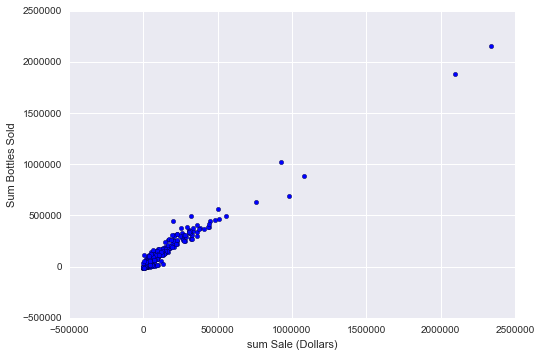

Score:  0.95429431425


In [53]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Sum Bottles Sold']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Sum Bottles Sold')
plt.show()
print 'Score: ', model.score(X, y)             

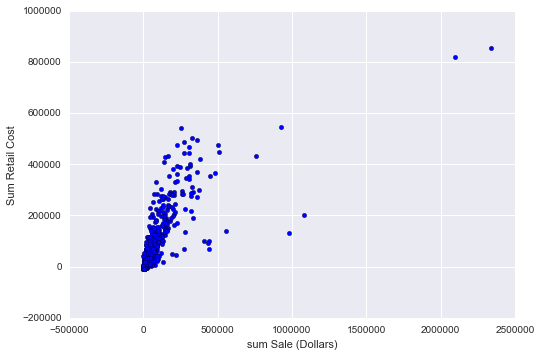

Score:  0.556159902205


In [54]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Sum Retail Cost']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Sum Retail Cost')
plt.show()
print 'Score: ', model.score(X, y)   

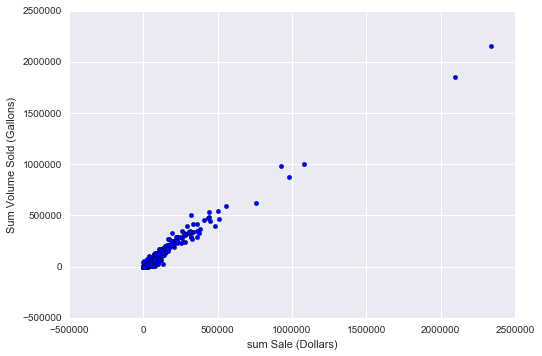

Score:  0.970884487889


In [55]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Sum Volume Sold (Gallons)']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Sum Volume Sold (Gallons)')
plt.show()
print 'Score: ', model.score(X, y)   

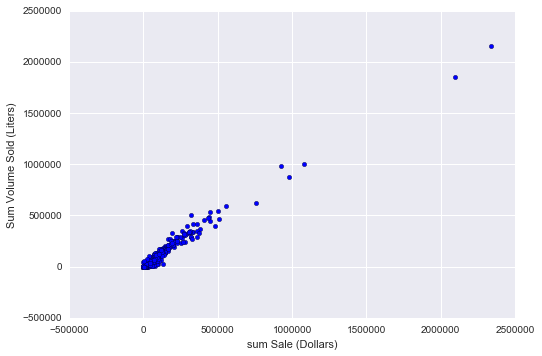

Score:  0.970875697551


In [56]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Sum Volume Sold (Liters)']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Sum Volume Sold (Liters)')
plt.show()
print 'Score: ', model.score(X, y)   

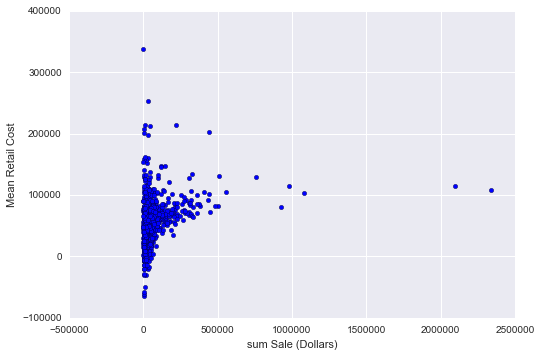

Score:  0.0833850407302


In [57]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Mean Retail Cost']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Mean Retail Cost')
plt.show()
print 'Score: ', model.score(X, y)   

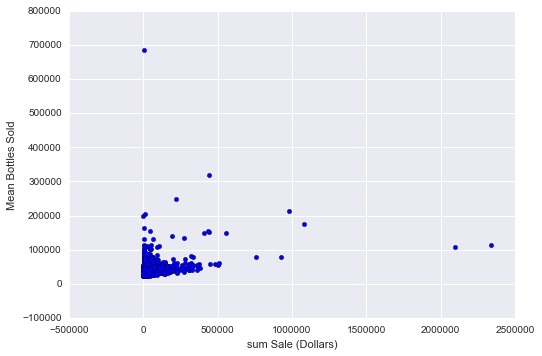

Score:  0.0511985414968


In [58]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Mean Bottles Sold']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Mean Bottles Sold')
plt.show()
print 'Score: ', model.score(X, y)   

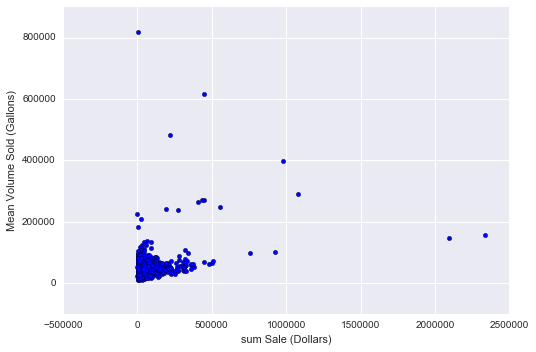

Score:  0.11252018909


In [59]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Mean Volume Sold (Gallons)']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Mean Volume Sold (Gallons)')
plt.show()
print 'Score: ', model.score(X, y)   

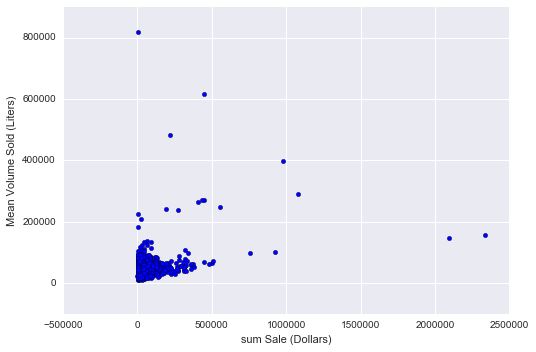

Score:  0.112539188157


In [60]:
# Now testing on all the variables I identified earlier
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[['Mean Volume Sold (Liters)']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel('sum Sale (Dollars)')
plt.ylabel('Mean Volume Sold (Liters)')
plt.show()
print 'Score: ', model.score(X, y)

In [61]:
#setting new x to 3 predictive variables
X3 = ['Sum Bottles Sold', 'Sum Volume Sold (Liters)', 'Sum Retail Cost']
X3

['Sum Bottles Sold', 'Sum Volume Sold (Liters)', 'Sum Retail Cost']

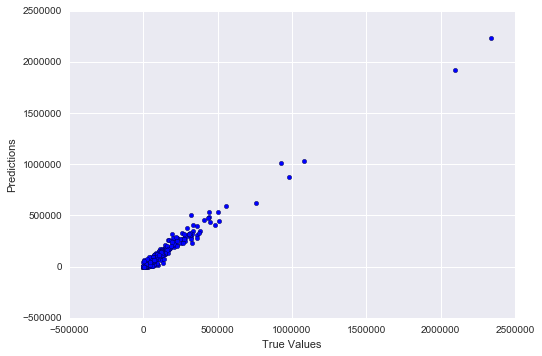

Score:  0.975854699145


In [62]:
# Testing a model withe most predictive variables from above tests
y = sales_totals_2015['sum Sale (Dollars)']
X = sales_totals_2015[X3]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print 'Score: ', model.score(X, y)

In [63]:
X3_r2_list = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    lm = linear_model.LinearRegression()

    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    X3_r2_list.append(model.score(X_test, y_test))

print 'Average score after 500 simulations: ', np.mean(X3_r2_list)

Average score after 500 simulations:  0.965970393581


Cross-validated scores: [ 0.9698867   0.9317924   0.89876727  0.9028731   0.98498697  0.62134242]
Cross-Predicted Accuracy: 0.969954201926


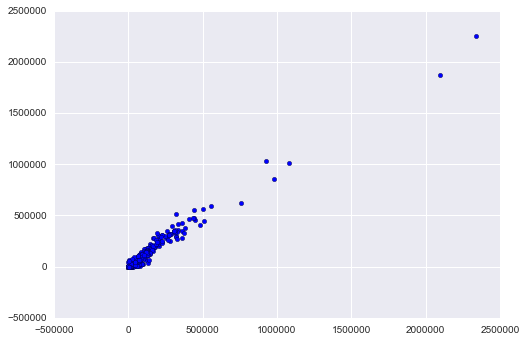

In [64]:
# Three variable model cross-validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

X = sales_totals_2015[X3]

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [65]:
# Create pivot table for 2016 sales
sales_totals_2016 = pd.pivot_table(df[(df['Year'] == 2016)], 
                                   values=['State Bottle Retail (Dollars)', 'Bottles Sold',
                                           'Volume Sold (Liters)', 'Volume Sold (Gallons)', 
                                           'Sale (Dollars)'], 
                                   index=['Store Number', 'County'], aggfunc=[np.sum, np.mean])
sales_totals_2016.reset_index(inplace=True)
sales_totals_2016.columns = [' '.join(col).strip() for col in sales_totals_2016.columns.values]
sales_totals_2016.head()

,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters)
0,2106,Black Hawk,23605,337804.05,5886.01,22277.95,19.206672,274.860903,4.789268,18.126892
1,2113,Webster,1703,21736.63,424.70,1608.07,4.333333,55.309491,1.080662,4.091781
2,2130,Black Hawk,19832,306942.27,4801.01,18172.75,19.087584,295.420857,4.620799,17.490616
3,2152,Cerro Gordo,749,9307.75,211.07,799.39,3.435780,42.696101,0.968211,3.666927
4,2178,Allamakee,4539,58939.90,1216.93,4606.64,7.577629,98.397162,2.031603,7.690551


In [66]:
# Predict total sales based off of the first three months of 2016 data
sales_predictions_2016 = sales_totals_2016[['sum Bottles Sold', 'sum Sale (Dollars)', 'sum Volume Sold (Liters)']]
predictions_2016 = model.predict(sales_predictions_2016)

In [67]:
print predictions_2016.shape
print sales_totals_2016['sum Sale (Dollars)'].shape

sales_totals_2016['Predicted 2016 Sales'] = predictions_2016
sales_totals_2016.head()

(1290,)
(1290,)


,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters),Predicted 2016 Sales
0,2106,Black Hawk,23605,337804.05,5886.01,22277.95,19.206672,274.860903,4.789268,18.126892,1.019905e+06
1,2113,Webster,1703,21736.63,424.70,1608.07,4.333333,55.309491,1.080662,4.091781,6.384764e+04
2,2130,Black Hawk,19832,306942.27,4801.01,18172.75,19.087584,295.420857,4.620799,17.490616,9.260137e+05
3,2152,Cerro Gordo,749,9307.75,211.07,799.39,3.435780,42.696101,0.968211,3.666927,2.620451e+04
4,2178,Allamakee,4539,58939.90,1216.93,4606.64,7.577629,98.397162,2.031603,7.690551,1.764345e+05


In [68]:
projected_2016_sales = sales_totals_2016[['Store Number', 'County', 'sum Sale (Dollars)', 'Predicted 2016 Sales']]
projected_2016_sales.columns = ['Store Number', 'County', 'Q1 2016 Sales', 'Projected 2016 Sales']
projected_2016_sales.head(20)

,Store Number,County,Q1 2016 Sales,Projected 2016 Sales
0,2106,Black Hawk,337804.05,1.019905e+06
1,2113,Webster,21736.63,6.384764e+04
2,2130,Black Hawk,306942.27,9.260137e+05
3,2152,Cerro Gordo,9307.75,2.620451e+04
4,2178,Allamakee,58939.90,1.764345e+05
5,2190,Polk,332979.03,1.007019e+06
6,2191,Lee,302592.88,9.123013e+05
7,2200,Sac,55315.23,1.652762e+05
8,2228,Madison,42398.57,1.265485e+05
9,2233,Dickinson,56241.57,1.681627e+05


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

https://davidrnovak.wordpress.com/2016/11/25/dsi-project-3/
password: DSI